In [1]:
from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { width: 90% !important; }</style>"))

# Data Dictionary

Column number | Column name | Type | Description
:---|:---|:---|:----  
0 | `'EmpID'` | categorical (nominal) | Employee ID
1 | `'Age'` | numerical (`int`) | Age of the employee
2 | `'AgeGroup'` | categorical (ordinal) | Age group to which the employee belongs
3 | `'Attrition'` | categorical (binary) | Employee attrition status (whether the employee has left the organization or is still active)
4 | `'BusinessTravel'` | categorical (ordinal) | Frequency of business travel for the employee
5 | `'DailyRate'` | numerical (`int`) | Daily rate of pay for the employee
6 | `'Department'` | categorical (nominal) | Department in which the employee works
7 | `'DistanceFromHome'` | numerical (`int`) | Distance in miles from the employee's home to the workplace
8 | `'Education'` | categorical (ordinal) | Level of education attained by the employee
9 | `'EducationField'` | categorical (nominal) | Field of education of the employee
10 | `'EmployeeCount'` | numerical (`int`) | Number of employees
11 | `'EmployeeNumber'` | categorical (nominal) | Unique identifier for each employee
12 | `'EnvironmentSatisfaction'` | categorical (ordinal) | Employee's satisfaction level with the work environment
13 | `'Gender'` | categorical (nominal) | Gender of the employee
14 | `'HourlyRate'` | numerical (`int`) | Hourly rate of pay for the employee
15 | `'JobInvolvement'` | categorical (ordinal) | Employee's level of job involvement
16 | `'JobLevel'` | categorical (ordinal) | Level of the employee's job position
17 | `'JobRole'` | categorical (nominal) | Role of the employee within the organization
18 | `'JobSatisfaction'` | categorical (ordinal) | Employee's satisfaction level with their job
19 | `'MaritalStatus'` | categorical (nominal) | Marital status of the employee
20 | `'MonthlyIncome'` | numerical (`int`) | Monthly income of the employee
21 | `'SalarySlab'` | categorical (ordinal) | Categorization of monthly income into salary slabs
22 | `'MonthlyRate'` | numerical (`int`) | Monthly rate of pay for the employee
23 | `'NumCompaniesWorked'` | numerical (`int`) | Number of companies the employee has worked for in the past
24 | `'Over18'` | categorical (binary) | Whether the employee is over 18 years old
25 | `'OverTime'` | categorical (binary) | Whether the employee works overtime or not
26 | `'PercentSalaryHike'` | numerical (`int`) | Percentage increase in salary for the employee
27 | `'PerformanceRating'` | categorical (ordinal) | Performance rating of the employee
28 | `'RelationshipSatisfaction'` | categorical (ordinal) | Employee's satisfaction level with work relationships
29 | `'StandardHours'` | numerical (`int`) | Standard working hours for the employee
30 | `'StockOptionLevel'` | categorical (ordinal) | Level of stock options granted to the employee
31 | `'TotalWorkingYears'` | numerical (`int`) | Total number of years the employee has worked
32 | `'TrainingTimesLastYear'` | numerical (`int`) | Number of training sessions attended by the employee in the last year
33 | `'WorkLifeBalance'` | categorical (ordinal) | Employee's work-life balance satisfaction level
34 | `'YearsAtCompany'` | numerical (`int`) | Number of years the employee has worked at the current company
35 | `'YearsInCurrentRole'` | numerical (`int`) | Number of years the employee has been in the current role
36 | `'YearsSinceLastPromotion'` | numerical (`int`) | Number of years since the employee's last promotion
37 | `'YearsWithCurrManager'` | numerical (`int`) | Number of years the employee has been working with the current manager

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Encoding

In [ ]:
# ? maybe better to NOT use zeroes? (0)

df.loc[:,'AgeGroup'] = df.loc[:,'AgeGroup'].replace({'18-25': 0,
                                                     '26-35': 1,
                                                     '36-45': 2,
                                                     '46-55': 3,
                                                     '55+': 4
                                                    })
df.loc[:,'Attrition'] = df.loc[:,'Attrition'].replace({'Yes': 1, 'No': 0})
df.loc[:,'BusinessTravel'] = df.loc[:,'BusinessTravel'].replace({'Non-Travel': 0,
                                                                 'Travel_Rarely': 1,
                                                                 'TravelRarely': 1,
                                                                 'Travel_Frequently': 2
                                                                })
df.loc[:,'Gender'] = df.loc[:,'Gender'].replace({'Male': 1, 'Female': 0})
df.loc[:,'MaritalStatus'] = df.loc[:,'MaritalStatus'].replace({'Single': 0,
                                                               'Divorced': 1,
                                                               'Married': 2
                                                              })
df.loc[:,'SalarySlab'] = df.loc[:,'SalarySlab'].replace({'Upto 5k': 0,
                                                         '5k-10k': 1,
                                                         '10k-15k': 2,
                                                         '15k+': 3})
df.loc[:,'OverTime'] = df.loc[:,'OverTime'].replace({'Yes': 1, 'No': 0})
df.loc[:,'PerformanceRating'] = df.loc[:,'PerformanceRating'].replace({3: 0, 4: 1})

## Feature candidates for predictions:
### Continuous:
'Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearWithCurrManager'

**Potentially:** 'YearsSinceLastPromotion' 

**Maybe:** 'DistanceFromHome', 'YearsAtCompany'

### Categorical:
'AgeGroup', 'Overtime', 'EnvironmentSatisfaction', 'BusinessTravel', 'JobLevel',
'SalarySlab', 'NumCompaniesWorked', 'MaritalStatus'

'Age', 'Overtime', 'MaritalStatus' seem to be the best candidates.

# Transformers Tests
### - PCA
### - poly
### - function transformer

## Import modules

In [1]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# fundamentals

from importlib import reload

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# global settings - global_settings.py

if 'global_settings' in dir():
    del global_settings

from global_settings import *
import global_settings
global_settings = reload(global_settings)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# custom functions collection - functions.py

if 'functions' in dir():
    del functions

from functions import *
import functions
functions = reload(functions)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# local variables

debug_mode = False

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Modelling-related Modules
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectPercentile

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Evaluation, optimization, metrics

from sklearn.metrics import recall_score, precision_score, precision_recall_curve, f1_score,\
roc_auc_score, classification_report, confusion_matrix, fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.inspection import permutation_importance

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# model

from sklearn.linear_model import LogisticRegression

## Prepare F2 metric

In [8]:
from sklearn.metrics import make_scorer,fbeta_score

def f2_score(y_true, y_pred):
    score = fbeta_score(y_true, y_pred, beta=2)
    return score

def f2():
    return make_scorer(f2_score)

## Load, clean and resample the data

In [9]:
raw_data = pd.read_csv('../Data/HR_Analytics.csv')

In [10]:
def sampling_data(DF):
    '''Only to be performed on the train-sets. Handles the outliers, encodes target vector and removes duplicates.
    '''
    DF.drop_duplicates(inplace=True)
    # not sure if it's a good practice to do it on the test set, maybe after split?
    # if happens after the split - requires reindexing of the target vector
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Attrition label encoding
    DF.loc[:,('Attrition')].replace({'Yes': 1, 'No': 0}, inplace=True)
    
    return DF

data = sampling_data(raw_data)

In [11]:
print('Duplicated observations: {}'.format(data.duplicated().sum()))

Duplicated observations: 0


In [12]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# train-test split

Xtrain, Xtest, ytrain, ytest = train_test_split(data.drop('Attrition', axis=1), 
                                                data['Attrition'], 
                                                test_size=0.2, 
                                                shuffle=True,
                                                stratify=data['Attrition'], 
                                                random_state=random_seed_split)
                                                # is stratify practically like undersampling or keeps the original proportion?

In [13]:
# Assign columns to column groups
catcols = ['AgeGroup', 'SalarySlab', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
numcols = ['Education', 'EnvironmentSatisfaction', 'BusinessTravel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
           'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'OverTime', 'Gender', 'Age', 'DailyRate', 'DistanceFromHome', 
           'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
delcols = ['EmpID', 'EmployeeNumber']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# clean data

def clean_data(DF, delcols=delcols):
    # df = DF.drop_duplicates()  
    df = DF.copy()
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # drop columns with 1 unique value (std=0)
    # practically: 'EmployeeCount', 'StandardHours', 'Over18'
    
    mask_single_value = list(df.nunique().index.values[df.nunique() == 1])
    df = df.loc[:, ~df.columns.isin(mask_single_value)]
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # drop prediction-useless columns
    
    for column in delcols:
        if column in df.columns.values:
            df = df.drop(column, axis=1)
        
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # categ. - label encoding
    
    # df['AgeGroup'].replace({'18-25': 0,
    #                         '26-35': 1,
    #                         '36-45': 2,
    #                         '46-55': 3,
    #                         '55+': 4
    #                        }, inplace=True)
    # df['BusinessTravel'].replace({'Non-Travel': 0,
    #                                'Travel_Rarely': 1,
    #                                'TravelRarely': 1,
    #                                'Travel_Frequently': 2
    #                               }, inplace=True)
    # df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)   # potentially better to one-hot encode
    # df['MaritalStatus'].replace({'Single': 0,
    #                              'Divorced': 1,
    #                              'Married': 2
    #                             }, inplace=True)
    # df['SalarySlab'].replace({'Upto 5k': 0,
    #                           '5k-10k': 1,
    #                           '10k-15k': 2,
    #                           '15k+': 3}, inplace=True)
    # df['OverTime'].replace({'Yes': 1, 'No': 0}, inplace=True)
    # df['PerformanceRating'].replace({3: 0, 4: 1}, inplace=True)
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Encoding as in SVC
    
    df = df.replace({"Yes": 1,
                     "No": 0,
                     "Non-Travel": 0,
                     "TravelRarely": 1,
                     "Travel_Rarely": 1,
                     "Travel_Frequently": 2})
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # NaN handling: fillna with median (temp)
        
    #df = df.dropna(axis=0)
    df = df.fillna(value={'YearsWithCurrManager': df.loc[:,'YearsWithCurrManager'].median()})
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Data Types Conversion
    
    col_dtypes = {'YearsWithCurrManager': 'int8',
                  # 'Department': 'category',
                  # 'EducationField': 'category',
                  # 'JobRole': 'category'
                 }

    for key in col_dtypes:
        df[key] = df[key].astype(col_dtypes[key])
    
    return df

In [14]:
Xtrain = clean_data(Xtrain)
Xtest = clean_data(Xtest)

## Importance threshold

In [29]:
importance_threshold = 0.002
selected_features = []

for feature in feature_importance_list:
    if feature[1] > importance_threshold:
        selected_features.append(feature[0])

print('Num of features selected: {} out of {}'.format(len(selected_features), len(feature_importance_list)))
f_divline(False, False)
print(selected_features)

Num of features selected: 25 out of 32
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['Age', 'AgeGroup', 'BusinessTravel', 'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [30]:
# additional features to be excluded
exclude_features = ['YearsSinceLastPromotion']

for feature in exclude_features:
    if feature in selected_features:
        selected_features.remove(feature)
        
print(len(selected_features))

24


### Preprocessing

In [31]:
Xtrain_feat_sel = Xtrain.copy()
Xtest_feat_sel = Xtest.copy()

Xtrain_feat_sel = Xtrain_feat_sel.loc[:, selected_features]
Xtest_feat_sel = Xtest_feat_sel.loc[:, selected_features]

print('Num of features in Xtrain:\t{}'.format(Xtrain_feat_sel.shape[1]))
print('Num of features in Xtest:\t{}'.format(Xtest_feat_sel.shape[1]))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Define num_cols and cat_cols

num_cols = list(Xtrain_feat_sel.select_dtypes(include='number').columns.values)
# cat_cols = list(Xtrain_feat_sel.select_dtypes(include='category').columns.values)
cat_cols = list(Xtrain_feat_sel.select_dtypes(include='object').columns.values)

Num of features in Xtrain:	24
Num of features in Xtest:	24


In [32]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# main pipeline

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
knnimp = KNNImputer(add_indicator=True)
simpimp = SimpleImputer(strategy='median')
std = StandardScaler()

imputer = simpimp

catpipe = make_pipeline(encoder)
numpipe = Pipeline([('imputer', simpimp),
                    ('scaler', std)])

coltrans = ColumnTransformer(transformers=[('encoder', encoder, cat_cols),
                                           ('numpipe', numpipe, num_cols)], remainder='drop')
selection = SelectPercentile(percentile=90) # percentile=10

### Instantiate classifier

In [33]:
model_name = 'Logistic Regression'
log = LogisticRegression(solver='saga',  
                         class_weight='balanced',
                         max_iter=int(1e4),
                         random_state=random_seed)

# check:
# solver='liblinear'

### Set search space

In [34]:
# np.set_printoptions(suppress=True) # to avoid scientific notation
# temp_C = np.linspace(start=0.01, stop=1, num=10, dtype='float')
# with logistic reg. you want to try the reg. values with increasing steps, not jump straight from the 
# little regul. to a lot

temp_C = np.geomspace(start=0.001, stop=1000, num=14, dtype='float')
print(temp_C)

[1.00000000e-03 2.89426612e-03 8.37677640e-03 2.42446202e-02
 7.01703829e-02 2.03091762e-01 5.87801607e-01 1.70125428e+00
 4.92388263e+00 1.42510267e+01 4.12462638e+01 1.19377664e+02
 3.45510729e+02 1.00000000e+03]


In [36]:
search_space = {'estimator__C': np.geomspace(start=0.0185, stop=0.0189, num=20, dtype='float'),
                'estimator__penalty': ['l1', 'l2'],  # l1 - lasso; l2 - ridge
                'estimator__solver': ['saga', 'liblinear']
                #'selector__percentile': [90]
                #'prepper__numpipe__imputer__strategy': ['mean', 'median']
               }
# start=0.0723, stop=0.0725
# start=0.08, stop=0.085
# np.geomspace(start=0.0041, stop=0.00416, num=20, dtype='float')  # best for 'saga'
# np.geomspace(start=0.21, stop=0.3, num=20, dtype='float')  # beginning of tunning of 'liblinear' 0.001 1000

## Pipeline finalization and grid search

In [37]:
pipe_log = Pipeline([('preproc', coltrans),
                     ('selector', selection),
                     ('estimator', log)])

pipe_log = GridSearchCV(estimator=pipe_log,
                        param_grid=search_space,
                        scoring=f2(),
                        cv=6,
                        verbose=3,
                        n_jobs=-1)
pipe_log.fit(Xtrain_feat_sel, ytrain)
#model_svc = pipe_svc.best_estimator_
#print(grid_svc.best_estimator_)

print(pipe_log.best_params_)
print(f'Best F2 score: {pipe_log.best_score_.mean():.2%}')
f_divline()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# prediction on the test set

ypred = pipe_log.best_estimator_.predict(Xtest_feat_sel)

print(f'F2 score on test set:\t{f2_score(ytest, ypred):.2%}')
print(f'Recall on test set:\t{recall_score(ytest, ypred):.2%}')
print(f'Precision on test set:\t{precision_score(ytest, ypred):.2%}')

Fitting 6 folds for each of 80 candidates, totalling 480 fits
{'estimator__C': 0.018541703462168678, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}
Best F2 score: 63.09%

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

F2 score on test set:	72.44%
Recall on test set:	87.23%
Precision on test set:	43.16%


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42,
                   solver='saga')

Best parameters:

{'estimator__C': 0.018541703462168678, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

              precision    recall  f1-score   support

  Stayed (0)     0.9700    0.7823    0.8661       248
    Left (1)     0.4316    0.8723    0.5775        47

    accuracy                         0.7966       295
   macro avg     0.7008    0.8273    0.7218       295
weighted avg     0.8842    0.7966    0.8201       295


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 



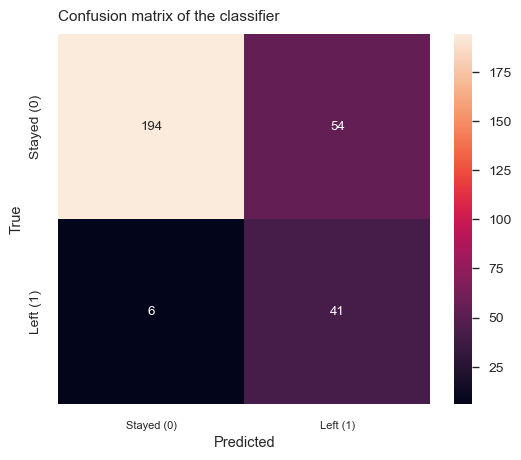

In [38]:
labels = ['Stayed (0)', 'Left (1)']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# classification report

display(log)
print('Best parameters:\n\n{}'.format(pipe_log.best_params_))
f_divline()
print(classification_report(ytest, ypred, target_names=labels, digits=4))
f_divline()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# confusion matrix

plt.subplots(figsize=(6,4.8))

confusion_matrix_base = confusion_matrix(ytest, ypred)
conf_plot = sns.heatmap(confusion_matrix_base, annot=True, fmt='d')

plt.title('Confusion matrix of the classifier')
conf_plot.set_xticklabels(labels)
conf_plot.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True');

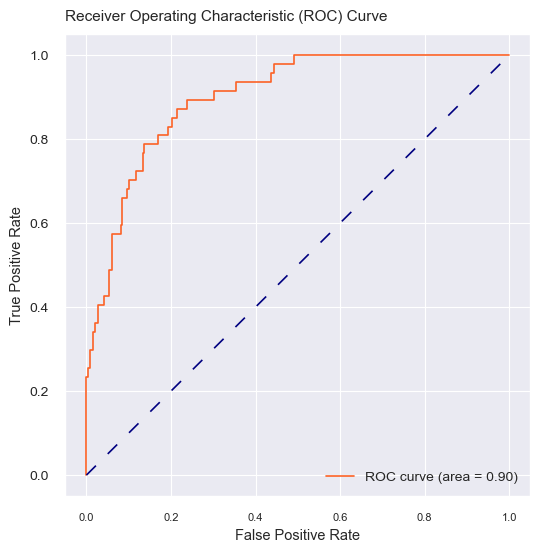

In [39]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# ROC plot

graph_roc = plot_roc(pipe_log, Xtest_feat_sel, ytest)

In [ ]:
# TEMP - visualization tweaks

yscores = pipe.predict_proba(Xtest)[:,1]
fpr, tpr, _ = roc_curve(ytest, yscores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color=color_palette[1], lw=1.2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1.2, linestyle=(0, (8,10)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

In [40]:
# increase the precision of result's display
pd.options.display.float_format = '{:.5f}'.format

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Best results of Cross Validation on GridSearch

results = pd.DataFrame(pipe_log.cv_results_).sort_values(by='mean_test_score', ascending=False).head(8).T
results

,50,54,34,26,38,74,22,42
mean_fit_time,0.01081,0.01163,0.01062,0.01032,0.01081,0.01101,0.01100,0.00955
std_fit_time,0.00262,0.00308,0.00247,0.00150,0.00184,0.00214,0.00226,0.00033
mean_score_time,0.00212,0.00224,0.00208,0.00218,0.00268,0.00287,0.00266,0.00211
std_score_time,0.00012,0.00021,0.00005,0.00015,0.00123,0.00179,0.00068,0.00009
param_estimator__C,0.01875,0.01877,0.01867,0.01863,0.01869,0.01888,0.01860,0.01871
param_estimator__penalty,l2,l2,l2,l2,l2,l2,l2,l2
param_estimator__solver,saga,saga,saga,saga,saga,saga,saga,saga
params,"{'estimator__C': 0.018751635163531444, 'estima...","{'estimator__C': 0.0187727586201518, 'estimato...","{'estimator__C': 0.018667378754809467, 'estima...","{'estimator__C': 0.018625392627414104, 'estima...","{'estimator__C': 0.018688407297755408, 'estima...","{'estimator__C': 0.01887873336901609, 'estimat...","{'estimator__C': 0.01860443498974545, 'estimat...","{'estimator__C': 0.01870945952906297, 'estimat..."
split0_test_score,0.63830,0.63830,0.63830,0.63830,0.63830,0.63830,0.63830,0.63830
split1_test_score,0.60606,0.60606,0.60606,0.60606,0.60606,0.60606,0.60606,0.60606


## Feature importance

In [41]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Estimate feature importance through permutation importance

result = permutation_importance(pipe_log, Xtrain_feat_sel, ytrain, n_repeats=50, random_state=random_seed)
importance_scores = result.importances_mean # abs

original_columns = Xtrain_feat_sel.columns
feature_importance_list = list(zip(original_columns, importance_scores))
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=False)
orig_sorted_features, orig_sorted_importance = zip(*sorted_feature_importance)

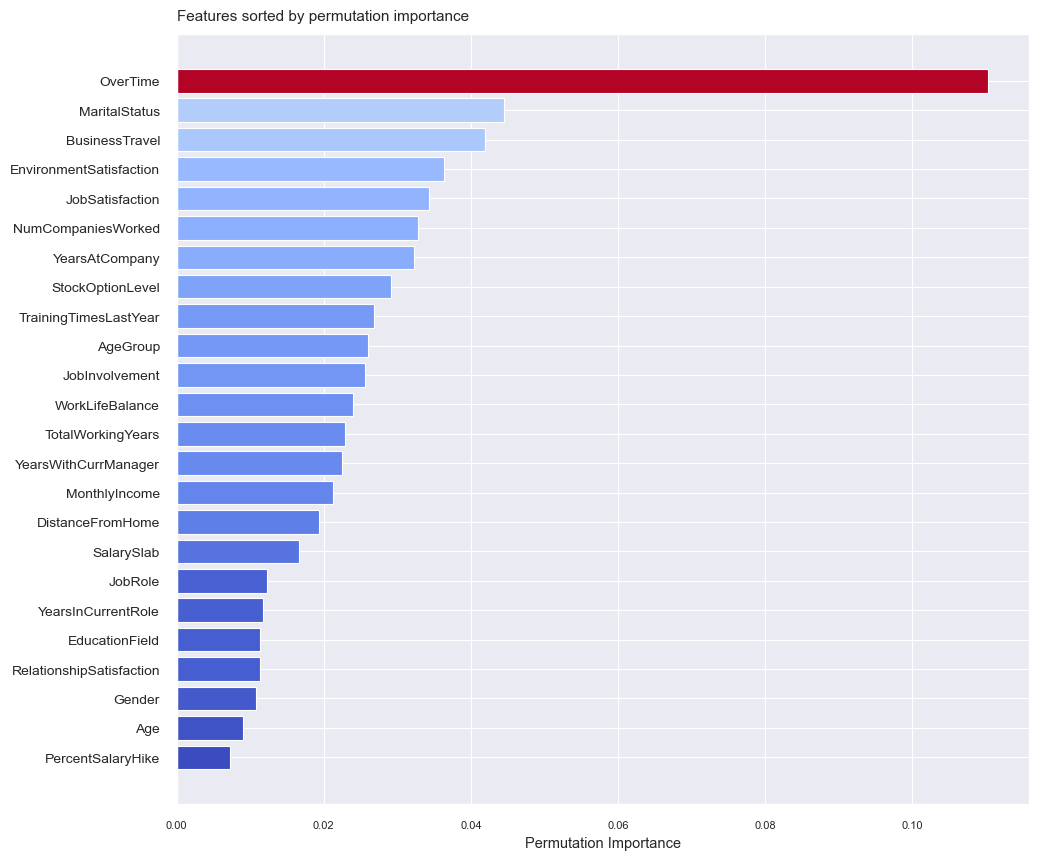

In [43]:
plt.rc('ytick', labelsize=10)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Visualization

import matplotlib as mpl
from matplotlib.cm import get_cmap

colors = []
cmap = mpl.colormaps['coolwarm']

# scale data
data = orig_sorted_importance
denominator = max(data) - min(data) # max(data) - min(data)
scaled_data = [(datum - min(data)) / denominator for datum in data]

for decimal in scaled_data:
    colors.append(cmap(decimal))


fig_feature_importance, ax = plt.subplots(figsize=(11,10))

ax.barh(orig_sorted_features, orig_sorted_importance, color=colors)
ax.set(title='Features sorted by permutation importance',
      xlabel='Permutation Importance');

#ax.set_xticklabels({:.2%})

In [17]:
import numpy as np
x = np.arange(start=0, stop=1, step=0.1, dtype='float')
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [15]:
x = np.arange(start=1, stop=5, step=0.2, dtype='float')
x

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

## Color Maps
cmap:\
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

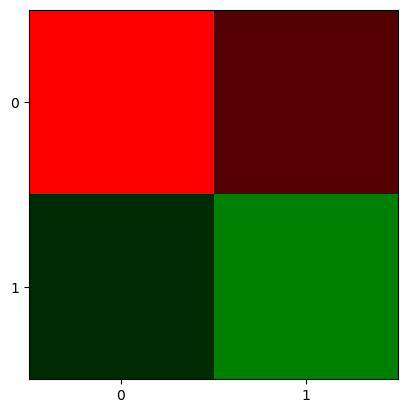

In [20]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable



import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# colormap definition
colors = ['red', 'black', 'green']
nodes = [0,0.5,1]
cf_cmap = LinearSegmentedColormap.from_list('RBlG', list(zip(nodes, colors)))

# reversed version
cf_cmap_r = cf_cmap.reversed()

# registering a colormap
mpl.colormaps.register(cmap=cf_cmap)
mpl.colormaps.register(cmap=cf_cmap_r)



fig, ax = plt.subplots()
# fig.subplots_adjust(wspace=0.5)
im1 = ax.imshow([[1, 2], [3, 4]], cmap='RBlG')



#ax1_divider = make_axes_locatable(ax1)
# Add an Axes to the right of the main Axes.
#cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
#cb1 = fig.colorbar(im1, cax=cax1)

# im2 = ax2.imshow([[1, 2], [3, 4]])
# ax2_divider = make_axes_locatable(ax2)
# # Add an Axes above the main Axes.
# cax2 = ax2_divider.append_axes("top", size="7%", pad="2%")
# cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")
# # Change tick position to top (with the default tick position "bottom", ticks
# # overlap the image).
# cax2.xaxis.set_ticks_position("top")

ax.set_xticks([0,1])
ax.set_yticks([0,1])

plt.show()